For each question, enter your answer as Markdown-formatted text and/or Python code in the cells provided. 

# Audible Fourier Transforms

1. When you first load the **Frequency and Phase** app, both signals are assigned the same frequency and a relative phase of zero. Since the signals are the same, the Fourier Transforms are also identical. How do the two FFTs begin to differ when (a) The frequency of one of the components changes, or (b) a relative phase is introduced? 

2. Again in the **Frequency and Phase** app, what does the signal *sound like* when the two frequencies are only *slightly different* from each other (e.g., 110 Hz and 107 Hz)? How is this reflected in the combined signal? How is it reflected in the FFT? 

3. In the **Gaussian Pulses** app, how does the width of the FFT curve change when you increase or decrease the pulse duration $\tau$? 

4. In the **Chirped Pulses** app, how does non-zero chirp alter the shape of the FFT? Why do you think this is? Can you hear this effect audibly? 

# Fourier Transforms in MD Analysis


As we'll see later in the course, spectroscopic signals usually result from the a charged (or more often polarized) material system oscillating at a characteristic frequency. Very often the frequency-domain signal that we record experimentally is in fact just the *Fourier transform* of the time trace of some collective variable such as the dipole moment ($\mu(t)$) or the average position $\langle x(t)\rangle$ of a group of particles. 

To give you some sense for how this works, the code below runs an MD simulation for an ideal gas of 1000 particles, and records the average particle position as a function of time. The backbone for this code is just the solution to Exercise 1, with only a couple of additions:
* Instead of the position of the first particle, we track the average position of *all* particles (calculated using `np.mean()`) in the NumPy vector``xavg``. (``xavg[n]`` is the average position of the particles at the $n^\text{th}$ time step.) 
* The red vertical line shows the *average* x-position of all particles at the given time step. 
* The x-velocities are randomly assigned, but all point in the +x direction. The y-velocities, in contrast, are evenly distributed between +y and -y directions. (This asymmetry is what gives us non-vanishing entries in `xavg`.) 

Run and explore the code and then answer the questions below. 

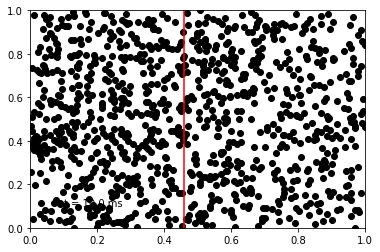

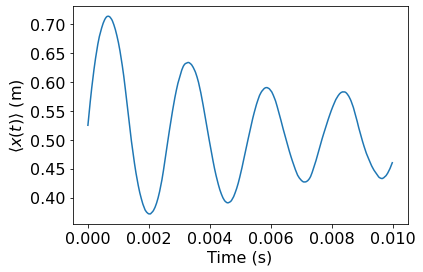

In [6]:
import math
import numpy as np

Npart = 1000
tmax=0.01     # Total simulation time in seconds
dt=0.000025    # Time-step in seconds
M=4            # Mass in AMU (1 AMU = 1.66054e-27 kg)
L=1.0          # Box length in meters
V=790          # Velocity (magnitude) in m/s

print("\n\nSuccessfully defined simulation parameters.")

x = L*np.random.random((Npart,))
y = L*np.random.random((Npart,))

# x-component of velocity is always **positive**
vx = np.random.random((Npart,))      # initial x-component of velocity (arbitrary units)

# y-component may be positive or negative
vy = np.random.random((Npart,))-0.5      # initial y-component of velocity (arbitrary units)

for n in range(0, Npart):
    NormFac = math.sqrt(vx[n]*vx[n] + vy[n]*vy[n])    # This square-root command is why we needed to import the math module
    vx[n] = V*vx[n]/NormFac                     # Normalize so that total velocity is V
    vy[n] = V*vy[n]/NormFac

print("Successfully initialized particle velocity and position")

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

# Don't need any changes here. 
graph_handle, = plt.plot(x, y, 'ko')
line_handle, = plt.plot(np.mean(x)*np.array([1,1]), [0, L], 'r')
text_handle = plt.text(0.1*L,0.1*L,'t = '+'{:.1f}'.format(0*dt*1000)+' ms')
plt.xlim([0,L])
plt.ylim([0,L])

Nsteps=int(round(tmax/dt))
xavg = np.zeros((Nsteps,))
for n in range(0,Nsteps):
    x = x + dt*vx
    y = y + dt*vy
    
    xavg[n] = np.mean(x)
    
    # Use for loop: 
    for m in range(0, Npart):
        if(x[m]>L or x[m]<0):
            vx[m]=-vx[m]
            x[m] += 2.0*dt*vx[m]
            
        if(y[m]>L or y[m]<0):
            vy[m]=-vy[m]
            y[m] += 2.0*dt*vy[m]
    
    line_handle.set_xdata(xavg[n]*np.array([1,1]))
    graph_handle.set_xdata(x)
    graph_handle.set_ydata(y)
    text_handle.set_text('t = '+'{:.1f}'.format(n*dt*1000)+' ms')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    

plt.figure()
taxis = np.arange(0, Nsteps)*dt
plt.plot(taxis, xavg)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('$\\langle x(t) \\rangle$ (m)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

1. Plot the absolute value of the FFT of the ``xavg`` trajectory. Use (and label with) proper units for the frequency axis! (Insert your code in the cell below). Use the ``plt.xlim()`` command to restrict the range of frequencies viewed to (roughly) the range where the FFT is significantly larger than zero. 

2. Of the numerous variables defined **before line 10 in the code** there are **two** that control the frequency where the FFT peaks. Which are they -- and why? Using the default parameters, you should find that the FFT peaks near 400 Hz. Can you explain this as a simple ratio of simulation parameters? 